# Business Understanding

Het kadaster heeft ons gevraagd om een GIS platform te maken waarbij het mogelijk moet worden om een platform te maken die goed omgaat met geodata. Het doel is om het complexe gedeelte van geo data weg te halen voor de particulier. Het moet ook een algemeen nut hebben voor de particulier. Om deze redenen is ervoor gekozen om een platform te maken waarbij het voor de particulier mogelijk is om hun een aantal punten aan te geven wat zij belangrijk vinden voor hun nieuwe wijk. Deze punten worden dan meegenomen in de uiteindelijke "voorspelling" wat de ideale wijk is voor die particulier.

Recreatie is ook een onderdeel die wordt gebruikt binnen het bepalen van de ideale wijk. Voordat dit kan worden gedaan moet deze data klaargemaakt en geanalyseerd worden zodat het voor de juiste doeleinde kan worden gebruikt. Het is dan ook de bedoeling dat hier nieuwe datasets worden aangemaakt die bovenstaande behoefte kan vervullen.

Deze dataset bevat data over elke wijk waar er een onderzoek heeft plaatsgevonden door het CBS. De data wordt door middel van een WFS functie ingeladen. WFS zorgt ervoor dat de onderliggende data wat normaal gebruikt wordt voor het plotten van kaarten zichtbaar kan worden gemaakt door middel van een geopandas dataframe. Geopandas is weer eer variant van de normale pandas, geopandas kan overweg met geo data.

# Data Understanding

De WFS data bestaat in totaal uit 79 kolommen en 4066 rijen aan data.

De dataset is met 79 kolommen te groot om per kolom te beschrijven. Dus de beschrijving zal in grote lijnen plaatsvinden.

De dataset bevat allereerst data als postcode, aantal inwoners, aantal inwoners per geslacht, aantal inwoners per leeftijdscategorie. De dataset beschikt ook over data over het aantal huishoudens, hoe de huishoudens zijn opgebouwd, dus 1 of meerder persoons, hoeveel geboorten er zijn en welke achtergrond de mensen hebben
De dataset bevat data over woningen, dus hoeveel woningen er zijn, wat de bouwjaar van de woningen zijn in categorieën, percentages koop en huur woningen, hoeveel woningen er van wooncorperaties zijn, wat de gemiddeld gebruik is van de woningen, dus gas en elektra.

De dataset bevat data over de inkomens over het algemeen, dus hoeveel procent er een hoog of laag inkomen heeft, hoeveel procent er in uitkering zit en welke uitkering.

Voor derest bestaat de dataset uit hoeveel voorzieiningen er in de buurt zijn in de straal van straalcategorieën, dus ziekenhuizen, , scholen, schoolniveau's, atracctieparken, noem maar op. Er is meerdere data hierover beschikbaar. Per postcode is er gekeken hoeveel ziekenhuizen er bijv in de straal van 10, 20 en 30 km liggen of hoeveel basisonderwijs er in een straal van 1, 3 of 5 km bevindt.

De volgende voorzieningen zijn beschikbaar in de dataset:
- Huisartspraktijken
- Apotheek
- Ziekenhuis
- Oprit
- Kinderdagverblijf
- Buitenschoolse opvang
- Basisonderwijs
- Voortgezet onderwijs
- HAVO/VWO
- VMBO
- Grote supermarkt
- winkels voor dagelijkse levensmiddelen
- Warenhuis
- Cafe
- Cafetaria
- Restaurant
- Hotel
- Treinstation
- Overstapstation
- Brandweerkazerne

## Beschrijven data

Hieronder wordt de data beschreven. Dit wordt telkens door een stukje code gedaan, met comments erbij.


In [358]:
from Helper_functions import *
import seaborn as sb


In [359]:
#test1 = wfs_data("https://geodata.nationaalgeoregister.nl/cbspostcode4/wfs?language=eng&", "cbspostcode4:postcode42017",0)
#test2 = wfs_data("https://geodata.nationaalgeoregister.nl/cbspostcode4/wfs?language=eng&", "cbspostcode4:postcode42017",1000)
#test3 = wfs_data("https://geodata.nationaalgeoregister.nl/cbspostcode4/wfs?language=eng&", "cbspostcode4:postcode42017",2000)
#test4 = wfs_data("https://geodata.nationaalgeoregister.nl/cbspostcode4/wfs?language=eng&", "cbspostcode4:postcode42017",3000)
#test5 = wfs_data("https://geodata.nationaalgeoregister.nl/cbspostcode4/wfs?language=eng&", "cbspostcode4:postcode42017",4000)

In [360]:
#df_recreatie = pd.concat([test1, test2, test3, test4, test5], ignore_index=True)

df_recreatie = pd.read_csv('../../raw-data/recreatie_nieuw.csv', index_col=0)

df_recreatie

,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,aantal_part_huishoudens,gemiddelde_huishoudensgrootte,...,hotel_gemiddelde_afstand_in_km,hotel_aantal_binnen_5_km,hotel_aantal_binnen_10_km,hotel_aantal_binnen_20_km,treinstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km,omgevingsadressendichtheid,stedelijkheid,geometry
0,9645,4990,4655,800,1195,3195,2920,1540,6380,1.5,...,0.2,349.1,400.0,464.4,1.2,1.2,0.7,6907,1,"POLYGON ((122246.2320000008 487910.1770000011,..."
1,8240,4480,3760,465,1195,4195,1730,650,5960,1.4,...,0.1,354.5,400.2,469.9,0.8,0.8,1.3,8410,1,"POLYGON ((121995.0291999988 488243.2021000013,..."
2,21080,10550,10525,2640,1860,7685,6115,2775,12580,1.7,...,0.6,338.0,398.9,467.7,1.7,1.7,2.0,6224,1,"POLYGON ((120506.2192000002 489494.5513000004,..."
3,645,375,270,65,45,400,115,20,330,1.7,...,0.4,245.4,400.1,470.6,1.7,1.7,1.6,2645,1,"POLYGON ((120390.1125999987 489860.7457000017,..."
4,14810,7545,7265,1410,1465,5235,4365,2340,9740,1.5,...,0.3,359.8,400.5,473.5,1.3,1.3,1.0,10975,1,"POLYGON ((120665.6422999986 488535.5, 120668.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,695,360,335,135,80,155,215,105,290,2.4,...,2.3,1.0,4.3,16.6,5.0,21.5,3.1,91,5,"POLYGON ((239924.2267999984 600089.6488000005,..."
4062,75,45,30,10,5,15,20,25,30,2.3,...,3.9,2.6,5.9,11.5,4.3,23.8,4.7,19,5,"POLYGON ((242620.2111000009 600841.8269999996,..."
4063,625,330,300,100,90,130,195,110,260,2.4,...,2.6,2.5,5.5,12.0,3.0,25.2,3.3,87,5,"POLYGON ((240755.5850000009 602191.4149999991,..."
4064,175,95,80,35,20,30,65,25,65,2.6,...,4.5,0.9,4.0,13.5,3.7,23.1,5.3,17,5,"POLYGON ((237960.0069999993 602041.3979999982,..."


In [361]:
# Info over de kolommen in perceelprijzen
info_kolommen_recreatie = df_recreatie.info()
info_kolommen_recreatie

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4066 entries, 0 to 4065
Data columns (total 79 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   aantal_inwoners                                  4066 non-null   int64  
 1   aantal_mannen                                    4066 non-null   int64  
 2   aantal_vrouwen                                   4066 non-null   int64  
 3   aantal_inwoners_0_tot_15_jaar                    4066 non-null   int64  
 4   aantal_inwoners_15_tot_25_jaar                   4066 non-null   int64  
 5   aantal_inwoners_25_tot_45_jaar                   4066 non-null   int64  
 6   aantal_inwoners_45_tot_65_jaar                   4066 non-null   int64  
 7   aantal_inwoners_65_jaar_en_ouder                 4066 non-null   int64  
 8   aantal_part_huishoudens                          4066 non-null   int64  
 9   gemiddelde_huishoudensgrootte 

In [362]:
# Beschrijvende statistieken van de data
beschrijvende_stats_recreatie = df_recreatie.describe(exclude='geometry')
beschrijvende_stats_recreatie

,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,aantal_part_huishoudens,gemiddelde_huishoudensgrootte,...,hotel_gemiddelde_afstand_in_km,hotel_aantal_binnen_5_km,hotel_aantal_binnen_10_km,hotel_aantal_binnen_20_km,treinstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km,omgevingsadressendichtheid,stedelijkheid,geometry
count,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,...,4066.000000,4066.00000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.00000,4066.000000,4066
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4066
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((193898.4215999991 470350.6369999982,..."
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,3413.069602,1198.473438,1132.528283,-2045.798574,-2434.535170,-980.518692,30.256026,-1387.346532,1006.169700,-907.676562,...,-783.793704,-778.88180,-764.869479,-723.626144,-779.969110,-772.820044,-784.183251,654.41638,-365.133546,NaN
std,10126.038275,9788.041965,10304.214194,16427.904983,17025.292481,14256.637983,10879.974704,14689.385521,9888.816494,9496.913971,...,8837.510745,8838.00454,8839.361262,8843.307983,8837.854005,8838.494151,8837.475900,6273.66813,6063.399710,NaN
min,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,...,-99997.000000,-99997.00000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.00000,-99997.000000,NaN
25%,656.250000,336.250000,320.000000,100.000000,75.000000,125.000000,215.000000,120.000000,266.250000,2.100000,...,1.300000,0.90000,4.700000,21.600000,2.300000,6.000000,1.400000,115.00000,2.000000,NaN
50%,2647.500000,1322.500000,1312.500000,410.000000,300.000000,565.000000,785.000000,485.000000,1110.000000,2.300000,...,2.600000,2.00000,8.400000,34.700000,5.000000,11.900000,2.400000,495.00000,4.000000,NaN
75%,6892.500000,3395.000000,3483.750000,1090.000000,790.000000,1645.000000,1905.000000,1255.000000,3130.000000,2.500000,...,4.500000,5.10000,17.000000,56.700000,9.300000,20.100000,3.800000,1500.75000,5.000000,NaN


In [363]:
# Informatie over de kolomnamen in de Dataframe
df_recreatie.columns

Index(['aantal_inwoners', 'aantal_mannen', 'aantal_vrouwen',
       'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar',
       'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar',
       'aantal_inwoners_65_jaar_en_ouder', 'aantal_part_huishoudens',
       'gemiddelde_huishoudensgrootte', 'aantal_eenpersoonshuishoudens',
       'aantal_meerpersoonshuishoudens_zonder_kind',
       'aantal_eenouderhuishoudens', 'aantal_tweeouderhuishoudens',
       'aantal_geboorten', 'percentage_nederlandse_achtergrond',
       'percentage_westerse_migr_achtergr',
       'percentage_niet_westerse_migr_achtergr', 'aantal_woningen',
       'aantal_woningen_bouwjaar_voor_1945',
       'aantal_woningen_bouwjaar_45_tot_65',
       'aantal_woningen_bouwjaar_65_tot_75',
       'aantal_woningen_bouwjaar_75_tot_85',
       'aantal_woningen_bouwjaar_85_tot_95',
       'aantal_woningen_bouwjaar_95_tot_05',
       'aantal_woningen_bouwjaar_05_tot_15',
       'aantal_woningen_bouwjaar_1

In [364]:
# Controleren op nulwaarden in de dataframe
df_recreatie.isna().sum()

aantal_inwoners                              0
aantal_mannen                                0
aantal_vrouwen                               0
aantal_inwoners_0_tot_15_jaar                0
aantal_inwoners_15_tot_25_jaar               0
                                            ..
overstapstation_gemiddelde_afstand_in_km     0
brandweerkazerne_gemiddelde_afstand_in_km    0
omgevingsadressendichtheid                   0
stedelijkheid                                0
geometry                                     0
Length: 79, dtype: int64

## Data Exploratie
In dit gedeelte worden een aantal plotjes getoont over de data. Ook wordt er gekeken naar de kwaliteit van de data.

# Data Preperation

In [365]:
#Dataframe maken van alleen recreatie onderdelen binnen 5km
df_recreatie = df_recreatie[['aantal_inwoners','winkels_ov_dagel_levensm_aantal_binnen_5_km', 'warenhuis_aantal_binnen_5_km', 'cafe_aantal_binnen_5_km', 'cafetaria_aantal_binnen_5_km', 'restaurant_aantal_binnen_5_km', 'hotel_aantal_binnen_5_km']]

df_recreatie

,aantal_inwoners,winkels_ov_dagel_levensm_aantal_binnen_5_km,warenhuis_aantal_binnen_5_km,cafe_aantal_binnen_5_km,cafetaria_aantal_binnen_5_km,restaurant_aantal_binnen_5_km,hotel_aantal_binnen_5_km
0,9645,967.2,10.8,732.7,861.0,1738.4,349.1
1,8240,986.0,10.9,737.9,874.3,1759.3,354.5
2,21080,809.5,9.5,677.7,772.2,1529.2,338.0
3,645,629.5,7.1,504.1,583.5,1086.6,245.4
4,14810,977.1,10.6,737.3,870.3,1740.9,359.8
...,...,...,...,...,...,...,...
4061,695,2.1,0.0,1.0,0.0,3.4,1.0
4062,75,6.9,1.0,1.9,3.8,7.7,2.6
4063,625,7.0,1.0,2.0,4.0,8.0,2.5
4064,175,2.2,0.1,0.9,0.5,3.1,0.9


In [366]:
#postcode zip inladen
zipfile = "zip://../../raw-data/Postcode4.zip"
df = gpd.read_file(zipfile)


In [367]:
#Postcodezip en df samenvoegen en hernoemen
df_recreatie = pd.concat([df_recreatie, df['PC4']], axis=1)
df_recreatie = df_recreatie.rename(columns={"PC4": "postcode"})
df_recreatie = movecol(df_recreatie, cols_to_move=['postcode'], ref_col='winkels_ov_dagel_levensm_aantal_binnen_5_km', place='After')
df_recreatie = movecol(df_recreatie, cols_to_move=['winkels_ov_dagel_levensm_aantal_binnen_5_km'], ref_col='postcode', place='After')
df_recreatie = movecol(df_recreatie, cols_to_move=['aantal_inwoners'], ref_col='postcode', place='After')
df_recreatie

,postcode,aantal_inwoners,winkels_ov_dagel_levensm_aantal_binnen_5_km,warenhuis_aantal_binnen_5_km,cafe_aantal_binnen_5_km,cafetaria_aantal_binnen_5_km,restaurant_aantal_binnen_5_km,hotel_aantal_binnen_5_km
0,1011,9645,967.2,10.8,732.7,861.0,1738.4,349.1
1,1012,8240,986.0,10.9,737.9,874.3,1759.3,354.5
2,1013,21080,809.5,9.5,677.7,772.2,1529.2,338.0
3,1014,645,629.5,7.1,504.1,583.5,1086.6,245.4
4,1015,14810,977.1,10.6,737.3,870.3,1740.9,359.8
...,...,...,...,...,...,...,...,...
4061,9995,695,2.1,0.0,1.0,0.0,3.4,1.0
4062,9996,75,6.9,1.0,1.9,3.8,7.7,2.6
4063,9997,625,7.0,1.0,2.0,4.0,8.0,2.5
4064,9998,175,2.2,0.1,0.9,0.5,3.1,0.9


In [368]:
df = pd.read_csv('../../raw-data/postcode_gemeente.csv', index_col=0)
df = df.rename(columns={"Gemeentenaam2019":"gemeente"})
df_recreatie = df_recreatie.merge(df, on='postcode')
df_recreatie = movecol(df_recreatie, cols_to_move=['gemeente'], ref_col='postcode', place='After')

df_recreatie.tail(50)

,postcode,gemeente,aantal_inwoners,winkels_ov_dagel_levensm_aantal_binnen_5_km,warenhuis_aantal_binnen_5_km,cafe_aantal_binnen_5_km,cafetaria_aantal_binnen_5_km,restaurant_aantal_binnen_5_km,hotel_aantal_binnen_5_km
4036,9943,Oldambt,325,3.1,0.0,1.9,1.4,2.1,0.6
4037,9944,Oldambt,1355,1.0,0.0,1.3,0.0,1.6,1.0
4038,9945,Delfzijl,1770,1.0,0.0,2.6,0.2,1.4,2.0
4039,9946,Delfzijl,960,2.8,0.0,1.0,0.9,2.8,1.9
4040,9947,Delfzijl,405,3.0,0.0,1.0,1.0,3.0,2.0
4041,9948,Delfzijl,310,3.0,0.0,1.0,1.0,3.0,2.0
4042,9949,Delfzijl,165,2.9,0.0,1.0,1.0,2.9,2.0
4043,9951,Het Hogeland,7470,9.8,0.0,5.2,3.0,5.8,0.0
4044,9953,Het Hogeland,1810,11.7,0.0,5.5,3.6,4.6,0.0
4045,9954,Het Hogeland,110,9.0,0.0,4.0,2.3,2.2,0.0


In [369]:
#nulwaardes als string omzetten naar 0
df_recreatie = df_recreatie.replace('-99997', 0)

In [370]:
#normaliseren
lijst = df_recreatie[['winkels_ov_dagel_levensm_aantal_binnen_5_km',
       'warenhuis_aantal_binnen_5_km', 'cafe_aantal_binnen_5_km',
       'cafetaria_aantal_binnen_5_km', 'restaurant_aantal_binnen_5_km',
       'hotel_aantal_binnen_5_km']]

for x in lijst:
    kolom = df_recreatie[[x]]
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(kolom)
    df_recreatie[x + "_genormaliseerd"] = pd.DataFrame(x_scaled)
    df_recreatie = movecol(df_recreatie, cols_to_move=[x + "_genormaliseerd"], ref_col=x, place='After')


In [371]:
#klasses aanmaken op basis van quantiles
for x in lijst:
    kolom = df_recreatie[x + "_genormaliseerd"]

    q_25 = kolom.quantile(q=.25)
    q_50 = kolom.quantile(q=.5)
    q_75 = kolom.quantile(q=.75)
    
    m1 = np.logical_and(kolom <= q_25, kolom != 0)
    m2 = np.logical_and(kolom >= q_25, kolom < q_50)
    m3 = np.logical_and(kolom >= q_50, kolom < q_75)
    m4 = kolom > q_75
    
    df_recreatie[x + "_klasse"] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')
    df_recreatie = movecol(df_recreatie, cols_to_move=[x + "_klasse"], ref_col=x + '_genormaliseerd', place='After')


In [372]:
df_recreatie

,postcode,gemeente,aantal_inwoners,winkels_ov_dagel_levensm_aantal_binnen_5_km,winkels_ov_dagel_levensm_aantal_binnen_5_km_genormaliseerd,winkels_ov_dagel_levensm_aantal_binnen_5_km_klasse,warenhuis_aantal_binnen_5_km,warenhuis_aantal_binnen_5_km_genormaliseerd,warenhuis_aantal_binnen_5_km_klasse,cafe_aantal_binnen_5_km,...,cafe_aantal_binnen_5_km_klasse,cafetaria_aantal_binnen_5_km,cafetaria_aantal_binnen_5_km_genormaliseerd,cafetaria_aantal_binnen_5_km_klasse,restaurant_aantal_binnen_5_km,restaurant_aantal_binnen_5_km_genormaliseerd,restaurant_aantal_binnen_5_km_klasse,hotel_aantal_binnen_5_km,hotel_aantal_binnen_5_km_genormaliseerd,hotel_aantal_binnen_5_km_klasse
0,1011,Amsterdam,9645,967.2,0.999439,Hoog,10.8,0.999969,Hoog,732.7,...,Hoog,861.0,0.999582,Hoog,1738.4,0.999454,Hoog,349.1,0.999828,Hoog
1,1012,Amsterdam,8240,986.0,0.999625,Hoog,10.9,0.999970,Hoog,737.9,...,Hoog,874.3,0.999714,Hoog,1759.3,0.999659,Hoog,354.5,0.999881,Hoog
2,1013,Amsterdam,21080,809.5,0.997878,Hoog,9.5,0.999956,Hoog,677.7,...,Hoog,772.2,0.998702,Hoog,1529.2,0.997399,Hoog,338.0,0.999717,Hoog
3,1014,Amsterdam,645,629.5,0.996096,Hoog,7.1,0.999932,Hoog,504.1,...,Hoog,583.5,0.996832,Hoog,1086.6,0.993050,Hoog,245.4,0.998794,Hoog
4,1015,Amsterdam,14810,977.1,0.999537,Hoog,10.6,0.999967,Hoog,737.3,...,Hoog,870.3,0.999674,Hoog,1740.9,0.999478,Hoog,359.8,0.999934,Hoog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,9995,Het Hogeland,695,2.1,0.989885,Laag,0.0,0.999861,Laag,1.0,...,Laag,0.0,0.991049,Laag,3.4,0.982409,Laag,1.0,0.996359,Middel
4082,9996,Het Hogeland,75,6.9,0.989933,Laag,1.0,0.999871,Middel-Hoog,1.9,...,Laag,3.8,0.991086,Laag,7.7,0.982451,Middel,2.6,0.996375,Middel-Hoog
4083,9997,Het Hogeland,625,7.0,0.989934,Middel,1.0,0.999871,Middel-Hoog,2.0,...,Laag,4.0,0.991088,Laag,8.0,0.982454,Middel,2.5,0.996374,Middel-Hoog
4084,9998,Het Hogeland,175,2.2,0.989886,Laag,0.1,0.999862,Middel,0.9,...,Laag,0.5,0.991054,Laag,3.1,0.982406,Laag,0.9,0.996358,Laag


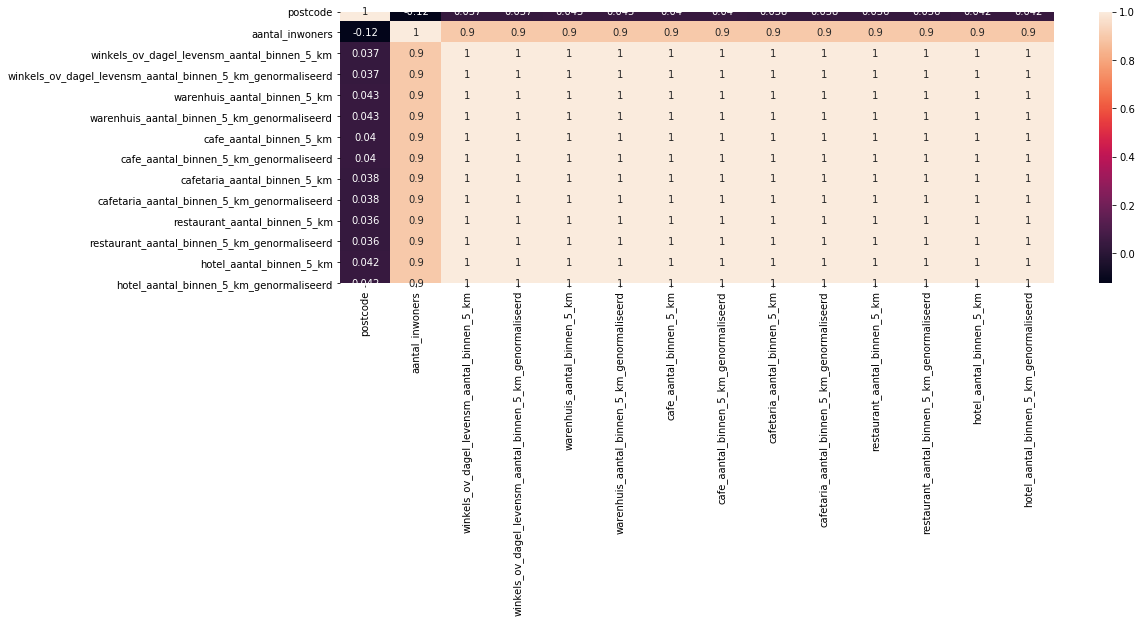

In [373]:
corr = df_recreatie.corr()
#corr
plt.figure(figsize = (16,5))
sb.heatmap(corr, annot=True)

# Uitkomst analyse

Uit de analyse van deze notebook, wordt gekeken naar de requirements uit de User Input die de user story nodig heeft. Hieruit wordt geadviseerd welke opties de user moet kunnen invoeren in het formulier.


Vervolgens wordt er een advies gegeven wat voor beschrijvende statistieken en voorspellende aspecten uit de dataset toegepast kunnen worden, zodat ook die bijbehorende user stories uitgevoerd kunnen worden op de huidige dataset.

## User input in het formulier

De huidige user story heeft als resultaat een aantal voorstellen voor verwerking in het formulier. De user story is:

**Als bezoeker wil ik graag een overzicht met recreatie mogelijkheden, zodat ik overzicht heb wat er binnen de gemeente te doen is.**

De dataset werkt met een classificatie van aantal reacreatiemogelijkheden in een bepaalde straal per recreatiemogelijkheid, dus bijvoorbeeld: aantal_ziekenhuizen_binnen_1_km



## Advies formulier

Indien er  wordt gekozen om voor recreatiemogelijkheden te laten aangeven in een formulier, dan zou ik aanraden om alleen een aantal recratiemogelijkheden te laten aanvinken, zoals cafe, restaurants en attractieparken etc. Dit kan door middel van een dropdown menu. Als extra optie kan de user aangeven welke klasse aan mogelijkheden het best bij de user past in bijvoorbeeld een drop down menu. Sommige gebruikers willen graag zo veel mogelijk opties zien, terwijl er ook gebruikers zijn die het fijner vinden om een geringe aantal opties te zien verschijnen.

## Advies Beschrijvende statistieken en voorspellende aspecten

De data in de analyse is gebaseerd per postcode. Er is veel meer data beschikbaar, alleen niet op te halen, omdat wfs een limiet heeft ingesteld. Hierdoor is de data beperkt.

Voor het uitwerken van user stories over het beschrijvende gedeelte van deze dataset, kan gekeken worden naar de recreatiemogelijkheden en hier beschrijvende statistieken op uitvoeren. Er zou bijvoorbeeld een mooi overzicht van de ontwikkelingen van het aantal cafe's, restaurants etc van een bepaalde omgeving in een regio als overzicht gegeven kunnen worden.

Op basis van deze data kan ook een invulling gegeven worden aan het voorspellende aspect van de recreatie.

# Modeling

Er worden in deze dataset één  voorspellende model techniek gebruikt. Deze techniek wordt in het onderdeel Select modeling technique toegelicht. Vervolgens wordt het model gebouwt en vervolgens getoetst en geëvalueerd.

## Select modeling technique

Er is één modelleertechniek die er op df_recreatie_lr toegepast gaan worden. Dit is ** Decision Tree  **.

Technieken zoals linieare regressie en tijdsreeksanalyse zijn niet relevant voor deze dataframe.

In [430]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score

d_tree = df_recreatie[['aantal_inwoners', 'cafe_aantal_binnen_5_km', 'cafe_aantal_binnen_5_km_klasse']]

y = d_tree[['cafe_aantal_binnen_5_km_klasse']]
y.replace(to_replace='Geen', value= '0', inplace=True)
y.replace(to_replace='Laag', value= '0', inplace=True)
y.replace(to_replace='Middel', value= '1', inplace=True)
y.replace(to_replace='Middel-Hoog', value= '2', inplace=True)
y.replace(to_replace='Hoog', value= '3', inplace=True)

y = y.astype(int)

feature_cols = ['aantal_inwoners']

x = d_tree[feature_cols].astype(int)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [431]:
clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=5)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
f1_score(y_test,y_pred, average='micro')

0.3939641109298532

In [432]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3939641109298532


In [433]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

 

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

 

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

 

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

 

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

 

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

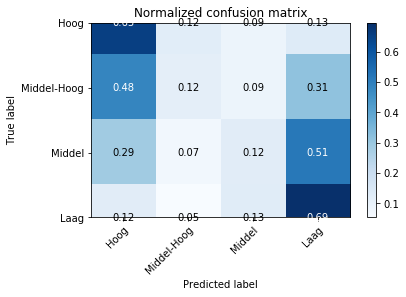

In [423]:
classes = ['Hoog','Middel-Hoog','Middel','Laag']
plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)

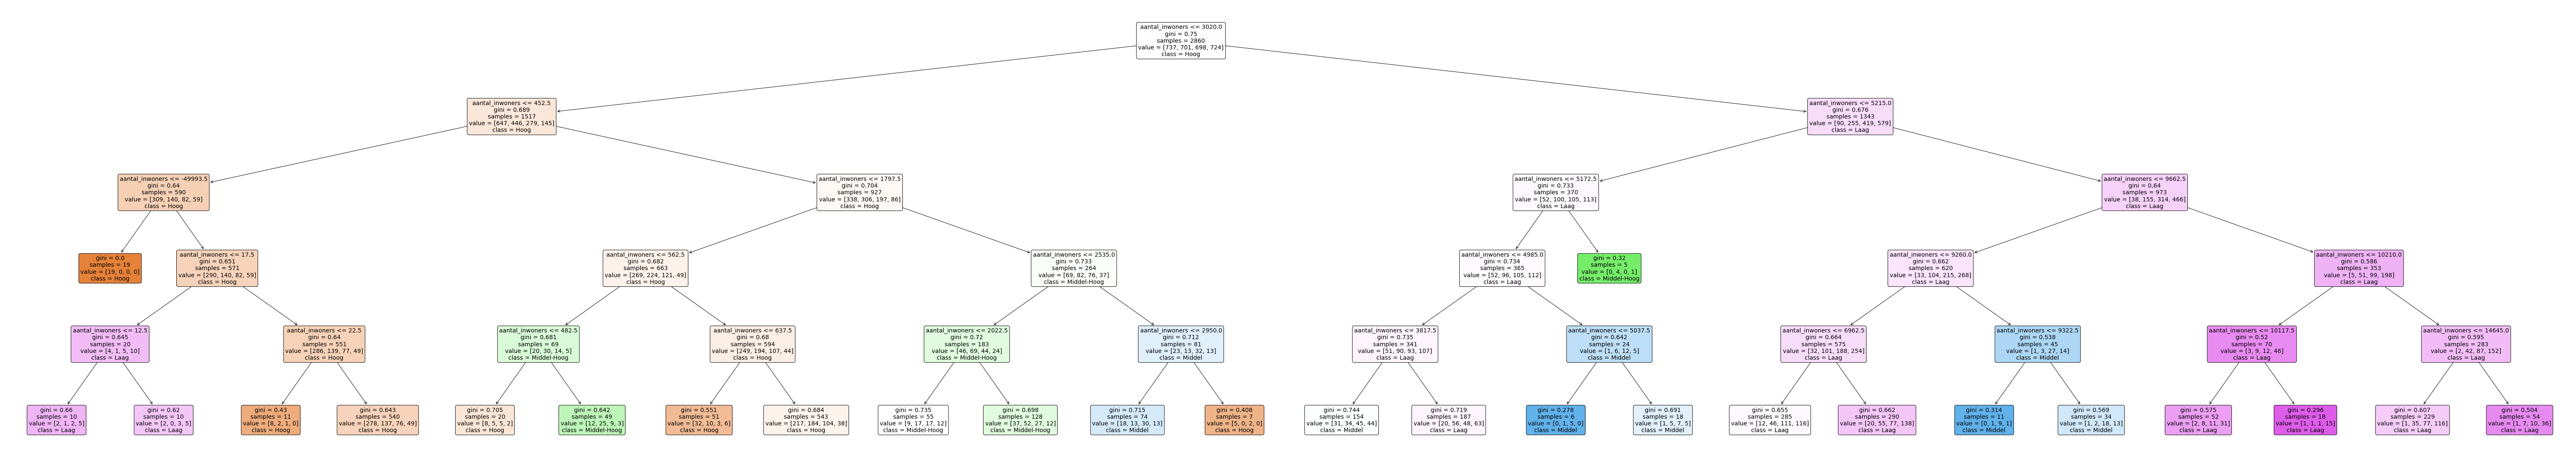

In [442]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(110,20))
a = plot_tree(clf,
              feature_names=feature_cols,
              class_names=['Hoog','Middel-Hoog','Middel','Laag'],
              filled=True,
              rounded=True,
              fontsize=14)
plt.savefig('tree.png')